In [1]:
import pandas as pd
import os
import git

In [2]:
def get_git_root(path):
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root

txn_date_col_name = "txn_date"
txn_description_col_name = "txn_description"
txn_amount_col_name = "txn_amount"
txn_category_col_name = "category"
txn_subcat_col_name = "sub_category"
processed_txn_filename = "categorized_txn.csv"
bank_col_name = "bank"
id_col_name = "unique_id"
txn_strftime_format = "%Y-%m-%d"

data_root_dir_append = "data"
data_raw_dir_append = "data/raw"
data_interim_dir_append = "data/interim"
data_processed_dir_append = "data/processed"

processed_txn_filename = "categorized_txn.csv"

In [3]:
git_root_path = get_git_root(os.getcwd())
processed_data_path = os.path.join(git_root_path, data_processed_dir_append)
processed_txn_path = os.path.join(processed_data_path, processed_txn_filename)

processed_txn_df = pd.read_csv(processed_txn_path, index_col= id_col_name)
processed_txn_df[txn_date_col_name] = pd.to_datetime(processed_txn_df[txn_date_col_name], format=txn_strftime_format)

In [4]:
processed_txn_df

,category,sub_category,txn_amount,txn_date,txn_description
unique_id,,,,,
usaa_checking_20191217_4.2,Food and Dining,Coffee,-4.20,2019-12-17,SQ *ALLEGRO COFFEE DENVER CO
usaa_checking_20191217_8.0,Gifts and Donations,Holiday/Birthday,-8.00,2019-12-17,TST* STIR COOKING SCHOOLTDENVER CO
usaa_checking_20191217_21.73,Auto and Transport,Auto - Parts,-21.73,2019-12-17,AMZN Mktp US*XA2802ID3 AMZN.COM BILLWA
usaa_checking_20191216_8.0,Education,Education - Miscellaneous,-8.00,2019-12-16,PARCHMENT - UNIV DOCS 480-719-1646 AZ
usaa_checking_20191216_23.65,Food and Dining,Bars,-23.65,2019-12-16,WILDWOOD VAIL CO
...,...,...,...,...,...
usaa_checking_20191023_20.79,Vanlife,Accessories,-20.79,2019-10-23,AMZN Mktp US*V56XK5P93 AMZN.COM BILLWA
usaa_checking_20191023_10.4,Vanlife,Accessories,-10.40,2019-10-23,AMZN Mktp US*TB7ZP9B63 AMZN.COM BILLWA
usaa_checking_20191022_103.0,Shopping,Clothes,-103.00,2019-10-22,VENMO PAYMENT ***********5665


In [5]:
processed_txn_df['year'] = processed_txn_df.apply(
    lambda x: 
    x[txn_date_col_name].year
    , axis = 1
)

processed_txn_df['month'] = processed_txn_df.apply(
    lambda x: 
    x[txn_date_col_name].month
    , axis = 1
)

processed_txn_df['day'] = processed_txn_df.apply(
    lambda x: 
    x[txn_date_col_name].day
    , axis = 1
)

processed_txn_df['weekday'] = processed_txn_df.apply(
    lambda x: 
    x[txn_date_col_name].strftime("%A")
    , axis = 1
)

In [6]:
month_grouped_df = processed_txn_df.groupby([txn_category_col_name, txn_subcat_col_name, 'year', 'month']).agg(
    sum_txns = pd.NamedAgg(column = txn_amount_col_name, aggfunc=sum),
    num_txns = pd.NamedAgg(column = txn_amount_col_name, aggfunc=pd.Series.nunique)
).reset_index()

In [14]:
cat_specific_df = month_grouped_df[month_grouped_df['category'] == 'Food and Dining']
#example_df = month_grouped_df[month_grouped_df['sub_category'] == "Auto - Gas"]
#month_grouped_df[month_grouped_df['category'] == "Auto and Transport"]
cat_specific_df

,category,sub_category,year,month,sum_txns,num_txns
18,Food and Dining,Alcohol,2019,10,-32.27,1.0
19,Food and Dining,Alcohol,2019,11,-64.05,3.0
20,Food and Dining,Bars,2019,11,-99.62,6.0
21,Food and Dining,Bars,2019,12,-78.31,5.0
22,Food and Dining,Coffee,2019,11,-78.18,16.0
23,Food and Dining,Coffee,2019,12,-67.82,11.0
24,Food and Dining,Groceries,2019,10,-180.19,6.0
25,Food and Dining,Groceries,2019,11,-600.62,26.0
26,Food and Dining,Groceries,2019,12,-261.96,10.0
27,Food and Dining,Restaurant - Group,2019,10,15.00,1.0


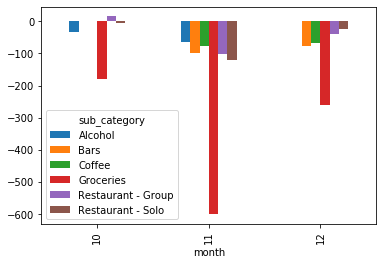

In [15]:
a = cat_specific_df.pivot(index='month', columns='sub_category', values='sum_txns').plot(kind='bar')

In [11]:
#           ab             channel   booked
# 0    control             book_it     466
# 1    control          contact_me     536
# 2    control             instant     17
# 3  treatment             book_it     494
# 4  treatment          contact_me     56
# 5  treatment             instant     22

# df.pivot(index='channel', columns='ab', values='booked').plot(kind='bar')

In [13]:
month_grouped_df['category'].unique()

array(['Auto and Transport', 'Bills and Utilities', 'Education',
       'Entertainment', 'Experiences', 'Fees and Charges',
       'Food and Dining', 'Gifts and Donations', 'Health and Fitnees',
       'Health and Fitness', 'Hobbies', 'Miscellaneous', 'Personal Care',
       'Salary', 'Shopping', 'Uncategorized', 'Vanlife'], dtype=object)